In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.pyplot as plt

path = '/media/robert/Data_Storage/VSim/Matched-Accelerating-Gradient/Witness_Beam_Distance/5e17PlasmaDensity/350um/'
simName = 'AccelGradient'

In [2]:
params = {'drive' : 'rhoDrive',
          'witness' : 'rhoWitness',
          'plasma' : 'electrons',
          'dumpInd' : 6,
          'path' : path,
          'simName' : simName,
          'zoom' : 4.0,
          'alphaCutoff' : .05
          }
#plot.drive_witness_density(params)

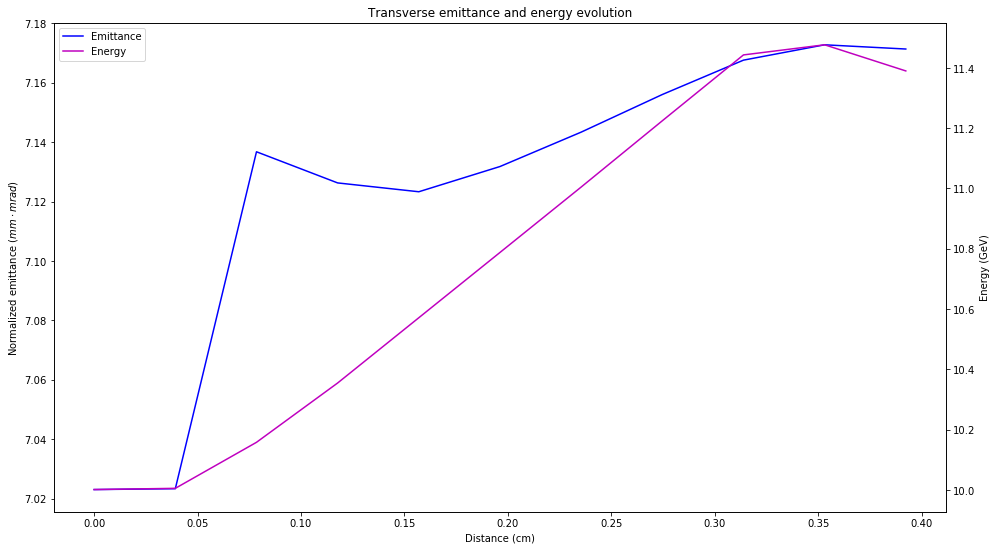

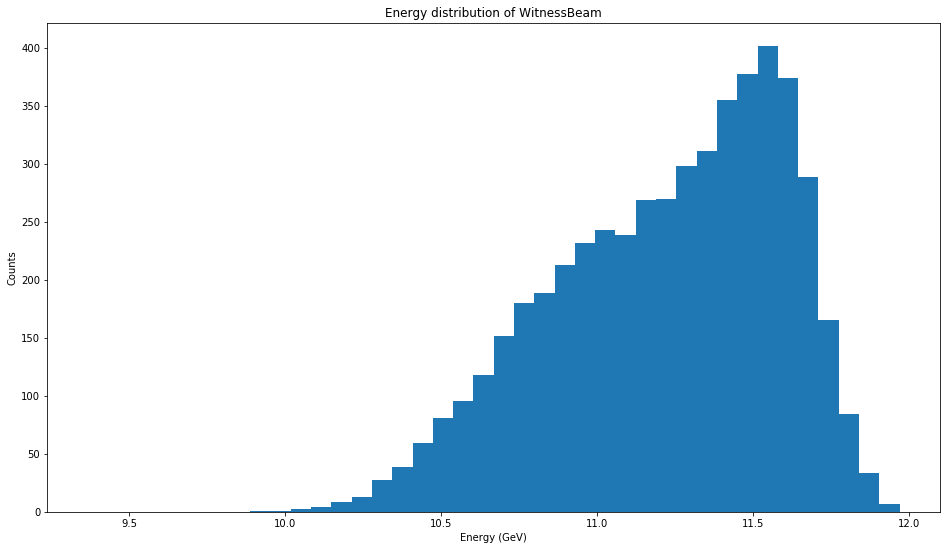

(d, e): ( 0.0 , 10.0011035556 )
(d, e): ( 0.0392319118586 , 10.0051938789 )
(d, e): ( 0.0784638237173 , 10.1578221586 )
(d, e): ( 0.117695735576 , 10.3546489323 )
(d, e): ( 0.156927647435 , 10.57110142 )
(d, e): ( 0.196159559293 , 10.7876687194 )
(d, e): ( 0.235391471152 , 11.0046055182 )
(d, e): ( 0.274623383011 , 11.2244688051 )
(d, e): ( 0.313855294869 , 11.4429790182 )
(d, e): ( 0.353087206728 , 11.4765443773 )
(d, e): ( 0.392319118587 , 11.389859857 )
grad:  543.764805733 GeV/m
std:  0.368253973917 GeV


In [3]:
params = {'species' : 'WitnessBeam',
          'path' : path,
          'simName' : simName,
          'Nt' : 10,
          'mass' : 0.511e-3
          }
d, e = plot.emittance_energy(params)
params['dumpInd'] = 7
params['bins'] = 40
plot.energy_distribution(params)
for i in range(len(d)):
    print('(d, e): (', d[i], ',', e[i], ')')
pFile = plot.get_filename(path, simName, params['species'], params['dumpInd'])
pData = load.get_species_data(pFile, params['species'])
weights = analyze.get_weights(pData)
energy = analyze.get_ptc_energy(pData, params['mass'])
average = np.average(energy, weights=weights)
var = np.average((energy-average)**2, weights=weights)
std = np.sqrt(var)
gradient = (e[7]-e[2]) / (d[7]-d[2]) *100
print('grad: ', gradient, 'GeV/m')
print('std: ', std, 'GeV')